In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

BATTERY LEVEL ACCURACY

In [10]:
bat_data = pd.read_csv("battery_data.csv")
bat_data.head(10)

Voltage  Battery Percentage
0      0.5                  13
1      1.0                  27
2      1.5                  41
3      2.0                  55
4      2.5                  69
5      3.0                  83
6      3.3                  90

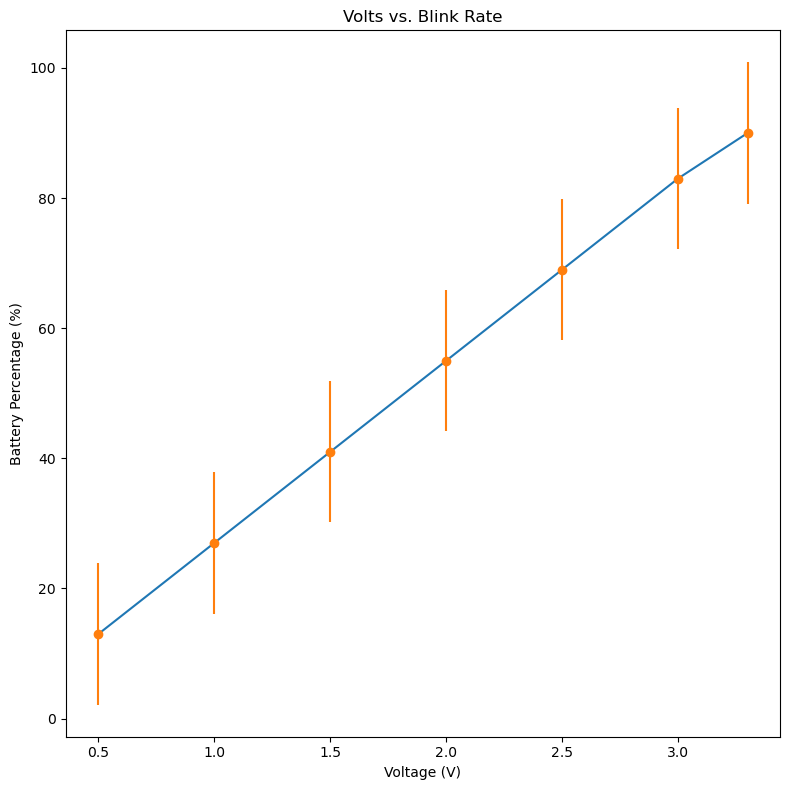

In [11]:
voltage = bat_data["Voltage"].to_numpy()
bat_p = bat_data["Battery Percentage"].to_numpy()

plt.figure(figsize=(8,8))
plt.xlabel('Voltage (V)')
plt.ylabel('Battery Percentage (%)')
plt.title('Volts vs. Blink Rate')
plt.plot(voltage, bat_p)
plt.errorbar(voltage, bat_p, yerr=sem(bat_p),fmt='o')

plt.tight_layout()
plt.show()

In [12]:
voltage_train, voltage_test, bat_p_train, bat_p_test = train_test_split(voltage, bat_p, test_size=0.2, random_state=42)

voltage_train= voltage_train.reshape(-1, 1)
voltage_test = voltage_test.reshape(-1, 1)

bat_p_train= bat_p_train.reshape(-1, 1)
bat_p_test = bat_p_test.reshape(-1, 1)

# Train the model
lm = LinearRegression()
lm.fit(voltage_train, bat_p_train)

r_squared = lm.score(voltage_test, bat_p_test)

print(f'R-squared for battery percentage: {r_squared}')

R-squared for battery percentage: 0.9906349770670462


VPP & PWM RELATIONSHIP

In [22]:
led1_data = pd.read_csv("led1_data.csv")
led1_data.head(20)

100 HZ   Vpp  Brightness
0       10  0.85       10.69
1       10  0.89       10.74
2       10  0.98       10.89
3       20  1.15       11.14
4       20  1.23       11.18
5       20  1.43       11.63
6       30  1.68       11.95
7       30  1.75       12.36
8       30  1.89       12.22
9       40  2.35       13.43
10      40  2.42       13.51
11      40  2.55       13.65
12      50  3.61       15.61
13      50  3.51       16.15
14      50  3.66       15.67

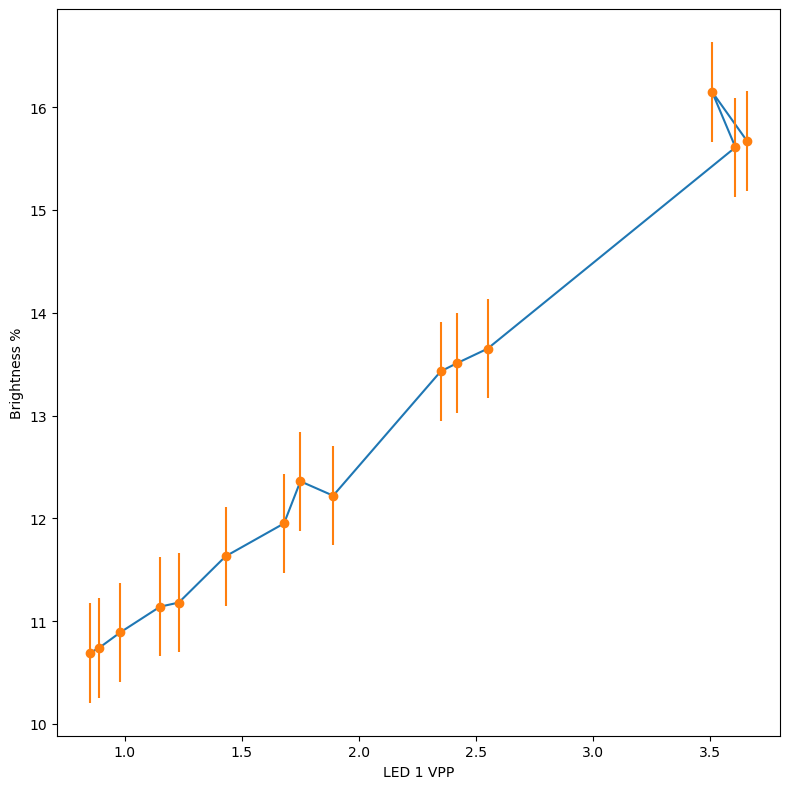

In [23]:
vpp = led1_data["Vpp"].to_numpy()
brightness = led1_data["Brightness"].to_numpy()

plt.figure(figsize=(8,8))
plt.xlabel('LED 1 VPP')
plt.ylabel('Brightness %')
plt.plot(vpp, brightness)
plt.errorbar(vpp, brightness, yerr=sem(brightness),fmt='o')

plt.tight_layout()
plt.show()

In [25]:
vpp_train, vpp_test, brightness_train, brightness_test = train_test_split(vpp, brightness, test_size=0.2, random_state=42)

vpp_train= vpp_train.reshape(-1, 1)
vpp_test = vpp_test.reshape(-1, 1)

brightness_train= brightness_train.reshape(-1, 1)
brightness_test = brightness_test.reshape(-1, 1)

# Train the model
lm = LinearRegression()
lm.fit(vpp_train, brightness_train)

r_squared = lm.score(vpp_test, brightness_test)

print(f'R-squared for vpp & pwm: {r_squared}')

R-squared for vpp & pwm: 0.9923687496861093


Max Input Frequency Theory:

The sampling frequency must be at least twice the maximum frequency of the input signal according to the Nyquist-Shannon sampling theorem. The sampling rate of our device is 200,000 samples per second. To find the maximum input frequency without aliasing we can use this theorem and divide 200,000Hz/2 to get 100kHz. This means that the ADC input can support input frequencies up to 100kHz without aliasing